
# Project: The Movie Data Base Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
    <ul>
    <li><a href="#Q1">Question 1</a></li>
    <li><a href="#Q2">Question 2</a></li>
    <li><a href="#Q3">Question 3</a></li>
    <li><a href="#Q4">Question 4</a></li>
    <li><a href="#Q5">Question 5</a></li>
    </ul>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>


<a id='intro'></a>
## Introduction

> Here in this Data Analysis Project I'm using TMDB dataset.
> This data contains information for over 10 thousand movies collected from The Movies DataBase (TMDB), and it includes user ratings, and revenue. It consits of 21 columns such as id, revenue, budget, release_year, etc.

> Questions that will be analyised from this dataset
>
> 1. Which genres are most popular from year to year?
> 2. What are the most produced genres?
> 3. What kinds of properties are associated with movies that have high revenues?
> 4. Which year had the most movies released?
> 5. Who are the top 5 production companies with most movies released?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [2]:
#Loading data into a dataframe and using 'id' as an index

df = pd.read_csv('tmdb-movies.csv', index_col='id')
df.head(3)

,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,,,,,,,,
135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [3]:
df.info()
print('-'*30)
print('This DataFrame has {} rows, and {} columns.'.format(df.shape[0], df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

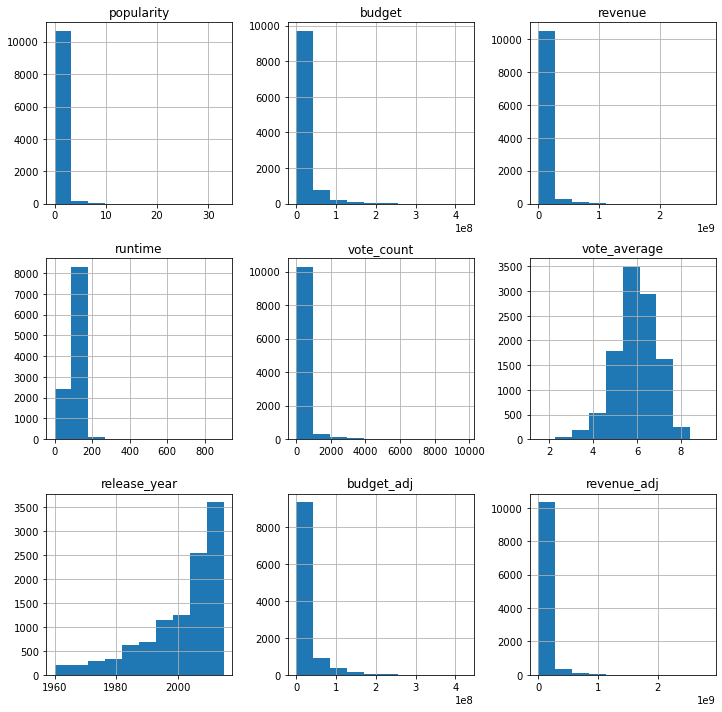

In [4]:
df.hist(figsize=(12,12));

In [5]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


### Impressions

> The dataset has a lot of useful data which can be used in many ways. However, we can see that many rows contain several values seperate by | such as the genres and production_companies columns which question related to. We'll be seperating them in the Data Cleaning phase.

Also, we'll be removing unnecessary columns such as:
> 1. tagline
> 2. keywords
> 3. overview
> 4. imdb_id
> 5. homepage

### Handling Zeros and NaN Values
> We'd notice that many values in columns such as revenue and budget are 0. We'll be replacing them with NaN and drop them for accurate results. Columns where values will be replaced from 0 to NaN are:
> 1. revenue
> 2. revenue_adj
> 3. budget
> 4. budget_adj
> 5. runtime



### Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10866 entries, 135397 to 22293
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               10856 non-null  object 
 1   popularity            10866 non-null  float64
 2   budget                10866 non-null  int64  
 3   revenue               10866 non-null  int64  
 4   original_title        10866 non-null  object 
 5   cast                  10790 non-null  object 
 6   homepage              2936 non-null   object 
 7   director              10822 non-null  object 
 8   tagline               8042 non-null   object 
 9   keywords              9373 non-null   object 
 10  overview              10862 non-null  object 
 11  runtime               10866 non-null  int64  
 12  genres                10843 non-null  object 
 13  production_companies  9836 non-null   object 
 14  release_date          10866 non-null  object 
 15  vote_count    

In [7]:
#Replacing zeros with NaN
df['revenue'].replace(0, np.NAN, inplace=True)
df['revenue_adj'].replace(0, np.NAN, inplace=True)
df['budget'].replace(0, np.NAN, inplace=True)
df['budget_adj'].replace(0, np.NAN, inplace=True)
df['runtime'].replace(0, np.NAN, inplace=True)

In [8]:
df.dropna(axis=0, inplace=True)

In [9]:
df.info()
print('-'*30)
print('Now there are {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 135397 to 8469
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   imdb_id               1287 non-null   object 
 1   popularity            1287 non-null   float64
 2   budget                1287 non-null   float64
 3   revenue               1287 non-null   float64
 4   original_title        1287 non-null   object 
 5   cast                  1287 non-null   object 
 6   homepage              1287 non-null   object 
 7   director              1287 non-null   object 
 8   tagline               1287 non-null   object 
 9   keywords              1287 non-null   object 
 10  overview              1287 non-null   object 
 11  runtime               1287 non-null   float64
 12  genres                1287 non-null   object 
 13  production_companies  1287 non-null   object 
 14  release_date          1287 non-null   object 
 15  vote_count      

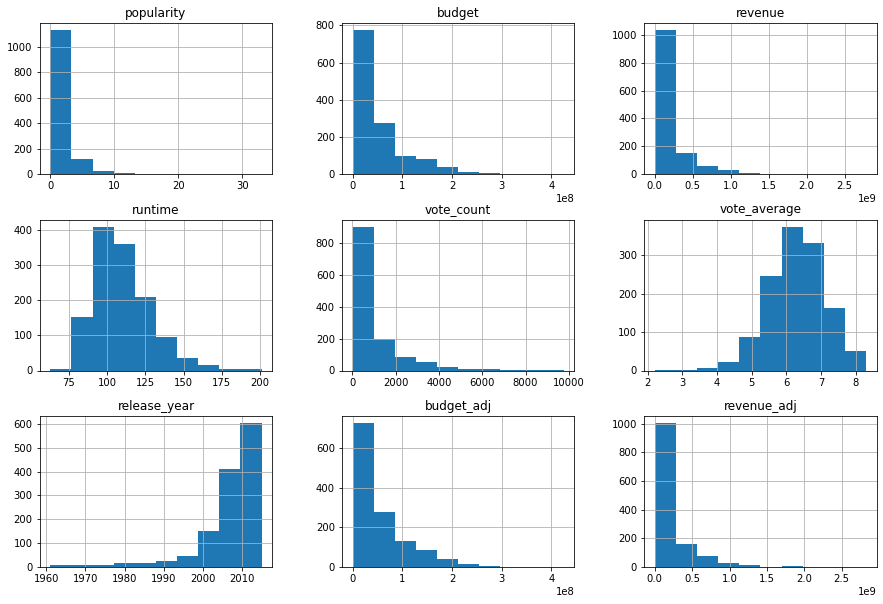

In [10]:
df.hist(figsize=(15, 10));

In [11]:
#Dropping un-needed columns
df = df.drop(['tagline', 'keywords', 'overview', 'imdb_id', 'homepage', 'director', 'cast'], axis=1)

df.head(3)

,popularity,budget,revenue,original_title,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
id,,,,,,,,,,,,,
135397,32.985763,150000000.0,1.513529e+09,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
262500,13.112507,110000000.0,2.952382e+08,Insurgent,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08


In [12]:
#Checking for duplicates
print('Duplicated values are: ', df.duplicated().sum())

Duplicated values are:  0


In [13]:
#Checking for data types
df.dtypes

popularity              float64
budget                  float64
revenue                 float64
original_title           object
runtime                 float64
genres                   object
production_companies     object
release_date             object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [14]:
print(df.info(), print('-'*30))
print('\nNow we have {} rows and {} columns.'.format(df.shape[0], df.shape[1]))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1287 entries, 135397 to 8469
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            1287 non-null   float64
 1   budget                1287 non-null   float64
 2   revenue               1287 non-null   float64
 3   original_title        1287 non-null   object 
 4   runtime               1287 non-null   float64
 5   genres                1287 non-null   object 
 6   production_companies  1287 non-null   object 
 7   release_date          1287 non-null   object 
 8   vote_count            1287 non-null   int64  
 9   vote_average          1287 non-null   float64
 10  release_year          1287 non-null   int64  
 11  budget_adj            1287 non-null   float64
 12  revenue_adj           1287 non-null   float64
dtypes: float64(7), int64(2), object(4)
memory usage: 140.8+ KB
------------------------------
None None

Now we have 1287 

Dropping NaN values has decreased the dataset values by approximately 90%. But that's to help us provide more accurate results

<a id='eda'></a>
## Exploratory Data Analysis
> Now coming to EDA. Which genres do we believe are popular year by year? Could it be Action, Comedy, or Drama? Lets find out!
<a id='Q1'></a>
### Research Question 1  (Which genres are most popular from year to year?)

In [15]:
#Splitting multiple column values into seperate columns - We'll be stacking them together in question one and five
#Source: https://nfpdiscussions.udacity.com/t/problem-with-merging-genres-data-with-movie-dataset/200606/6
df_genre = df['genres'].str.split('|', expand=True)

df_genre.head(3)

,0,1,2,3,4
id,,,,,
135397,Action,Adventure,Science Fiction,Thriller,None
76341,Action,Adventure,Science Fiction,Thriller,None
262500,Adventure,Science Fiction,Thriller,None,None


In [16]:
#Stacking genres together into one column with an index for each row
df_genre = df_genre.stack()
#Creating a data frame
df_genre = pd.DataFrame(df_genre)
#Renaming column '0' to 'genres_stacked'
df_genre = df_genre.rename(columns={0:'genres_stacked'})
#Joining release_year column into dataframe
df_genre = df_genre.join(df['release_year'])
#Creating a list for vote_average which we'll use to filter for highest popularity
vote_average = df['vote_average']
#Joining vote_average into dataframe
df_genre = df_genre.join(vote_average)

df_genre.head(3)

genres_stacked  release_year  vote_average
id                                                   
135397 0           Action          2015           6.5
       1        Adventure          2015           6.5
       2  Science Fiction          2015           6.5

How many movies does the Action genre has?

In [17]:
df_genre[df_genre['genres_stacked'] == 'Action'].value_counts().sum()

415

lets see how many genres does the Comedy genre has

In [18]:
df_genre[df_genre['genres_stacked'] == 'Comedy'].value_counts().sum()

414

Now lets visualize Dataframe with popular genres year by year and check most common popular genres

In [19]:
#Creating a list of years to loop through
#Source: https://www.kite.com/python/answers/how-to-build-a-pandas-dataframe-with-a-for-loop-in-python
years = df_genre['release_year'].unique()
genres_votes_list = []

for year in years:
    #Filtering through each year
    q = df_genre[df_genre['release_year'] == year]
    #Dropping release_yearand vote_average columns to store most preduced genre
    w = q.drop(['release_year', 'vote_average'], axis=1)
    #Stacking max values for most common genre
    e = w.stack().value_counts().idxmax()
    #Masking original dataframe to loop through for genre with maxmium vote_average value
    r = df_genre[df_genre['release_year'] == year]
    t = r.groupby(['genres_stacked'])['vote_average'].mean().idxmax()
    #Appending year, maxmium value count for genre, and highest rated genre into created list 
    genres_votes_list.append([year, e, t])

In [20]:
genres_df_final = pd.DataFrame(genres_votes_list, columns=['release_year', 'most_produced_genre', 'most_popular_genre']).sort_values('release_year').reset_index().drop(['index'], axis=1)

In [21]:
genres_df_final

,release_year,most_produced_genre,most_popular_genre
0,1961,Family,Comedy
1,1962,Adventure,Action
2,1963,Thriller,Action
3,1964,Adventure,Action
4,1965,Adventure,Action
5,1967,Thriller,Action
6,1969,Adventure,Action
7,1971,Thriller,Crime
8,1972,Crime,Crime
9,1973,Thriller,Drama


Now lets plot the above results into something to visualize it better

In [22]:
#Creating a function to plot results to reduce repetitive code
def plot(data, column ,x, y, plt_title):
    """Takes in data to plot as horizontal bars, with a column to sort by, an xlabel, ylabel, and the plot's title"""
    data_df = pd.DataFrame(data)
    chart = data_df.sort_values(column, ascending=True).plot(kind='barh', color='red', figsize=(10, 8), fontsize=11)
    x_label = plt.xlabel(x, fontsize=13)
    y_label = plt.ylabel(y, fontsize=13)
    title = plt.title(plt_title, fontsize=15)
    style = sns.set_style('darkgrid')
    
    return (chart, x_label, y_label, title)

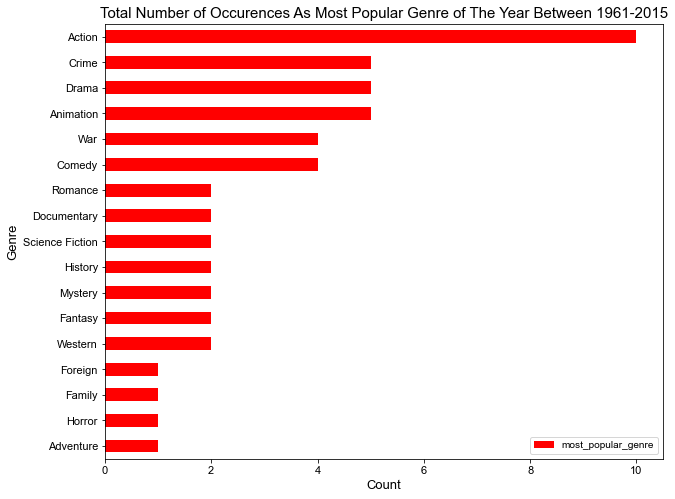

In [23]:
#Assigning variables to be used int the plot function to show desired results
chart_1 = genres_df_final['most_popular_genre'].value_counts()
x_label = 'Count'
y_label = 'Genre'
title = 'Total Number of Occurences As Most Popular Genre of The Year Between 1961-2015'
column = 'most_popular_genre'

plot(chart_1, column, x_label, y_label, title);

Action was the most popular genre each year by more than 40% popularity overall through 1961-2015.

Now, which are the most produced genre. Could it be Action which was the most popular genre year by year, or could it be something else? Lets find out!

<a id='Q2'></a>
### Research Question 2  (What are the most produced genres?)

Could the Action genre be the most produced genre of all times?

In [24]:
df_genre['genres_stacked'].value_counts()['Action']

415

Now lets find out what are the most produced genres

In [25]:
#Loading genres count from genre's dataframe
chart_2 = df_genre['genres_stacked'].value_counts()

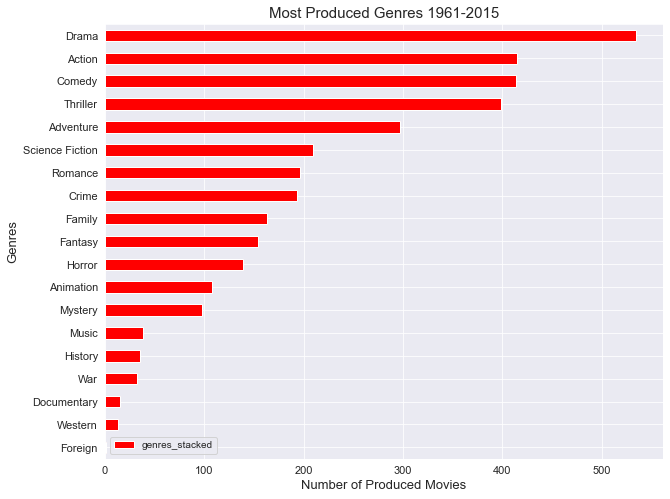

In [26]:
#Calling in plot function and defining variables to use
x_label = 'Number of Produced Movies'
y_label = 'Genres'
title = 'Most Produced Genres 1961-2015'
column = 'genres_stacked'

plot(chart_2, column, x_label, y_label, title);

We can see that Drama, Action, Comedy, Thriller, and Adventure are the top 5 most common produced genres in this dataset respectively.

So far we've answered what are the most popular genres year by year, and most produced genres. Coming to our next important question, what kind of properties are associated with movies that has high revenues? Could high budgets, popularity, vote average, or movie's runtime be a good factor that could lead to high revenue. Lets find that out!

<a id='Q3'></a>
### Research Question 3  (What kinds of properties are associated with movies that have high revenues?)

In [27]:
#Creating a revenue dataframe
revenue = pd.DataFrame(df['revenue'].sort_values(ascending=False))

In [28]:
revenue.head(3)

,revenue
id,
19995,2.781506e+09
140607,2.068178e+09
597,1.845034e+09


In [29]:
#Creating a list of columns to loop through and fetch from original dataframe
columns_list = ['budget', 'popularity', 'vote_average', 'runtime', 'budget']

for i in columns_list:
    revenue[i] = df[i]

In [30]:
def sub_plots(x_axis, y_axis):
    """Takes in a data and columns to plot in a 2 by 2 figure.
    x_axis: a dataframe and a desired column to be used as an x axis
    y_axis: Dictionary that contains 4 keys and values.
    column_1 to column_4 value keys will be the 4 columns to plot on the y axis,
    and the title_1 to title_4 value keys will be the 4 titles for each plot"""
    
    #Source for creating subplots: https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
    #Creating a 2 by 2 figure to plot 4 charts
    figs, ax = plt.subplots(2, 2, figsize=(20,10))
    #First chart - Top left
    chart_1 = sns.regplot(x=revenue['revenue'], y=revenue[y_axis['column_1']],color='c',ax=ax[0][0])
    ax[0, 0].set_title(y_axis['title_1'], fontsize=13)
    #Second chart - Top Right
    chart_2 = sns.regplot(x=revenue['revenue'], y=revenue[y_axis['column_2']], color='c', ax=ax[0][1])
    ax[0, 1].set_title(y_axis['title_2'], fontsize=13)
    #Third chart - Bottom Left
    chart_3 = sns.regplot(x=revenue['revenue'], y=revenue[y_axis['column_3']], color='c', ax=ax[1][0])
    ax[1, 0].set_title(y_axis['title_3'], fontsize=13)
    #Forth chart - Bottom Right
    chart_4 = sns.regplot(x=revenue['revenue'], y=revenue[y_axis['column_4']], color='c', ax=ax[1][1])
    ax[1, 1].set_title(y_axis['title_4'], fontsize=13)
    
    return(chart_1, chart_2, chart_3, chart_4)

In [31]:
def sub_plots(x_axis, y_axis):
    """Takes in a data and columns to plot in a 2 by 2 figure.
    x_axis: a dataframe and a desired column to be used as an x axis
    y_axis: Dictionary that contains 4 keys and values.
    column_1 to column_4 value keys will be the 4 columns to plot on the y axis,
    and the title_1 to title_4 value keys will be the 4 titles for each plot"""
    
    #Source for creating subplots: https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/subplots_demo.html
    #Creating a 2 by 2 figure to plot 4 charts
    figs, ax = plt.subplots(2, 2, figsize=(20,10))
    #First chart - Top left
    chart_1 = sns.regplot(x=x_axis, y=revenue[y_axis['column_1']],color='c',ax=ax[0][0])
    ax[0, 0].set_title(y_axis['title_1'], fontsize=13)
    #Second chart - Top Right
    chart_2 = sns.regplot(x=x_axis, y=revenue[y_axis['column_2']], color='c', ax=ax[0][1])
    ax[0, 1].set_title(y_axis['title_2'], fontsize=13)
    #Third chart - Bottom Left
    chart_3 = sns.regplot(x=x_axis, y=revenue[y_axis['column_3']], color='c', ax=ax[1][0])
    ax[1, 0].set_title(y_axis['title_3'], fontsize=13)
    #Forth chart - Bottom Right
    chart_4 = sns.regplot(x=x_axis, y=revenue[y_axis['column_4']], color='c', ax=ax[1][1])
    ax[1, 1].set_title(y_axis['title_4'], fontsize=13)
    
    return(chart_1, chart_2, chart_3, chart_4)

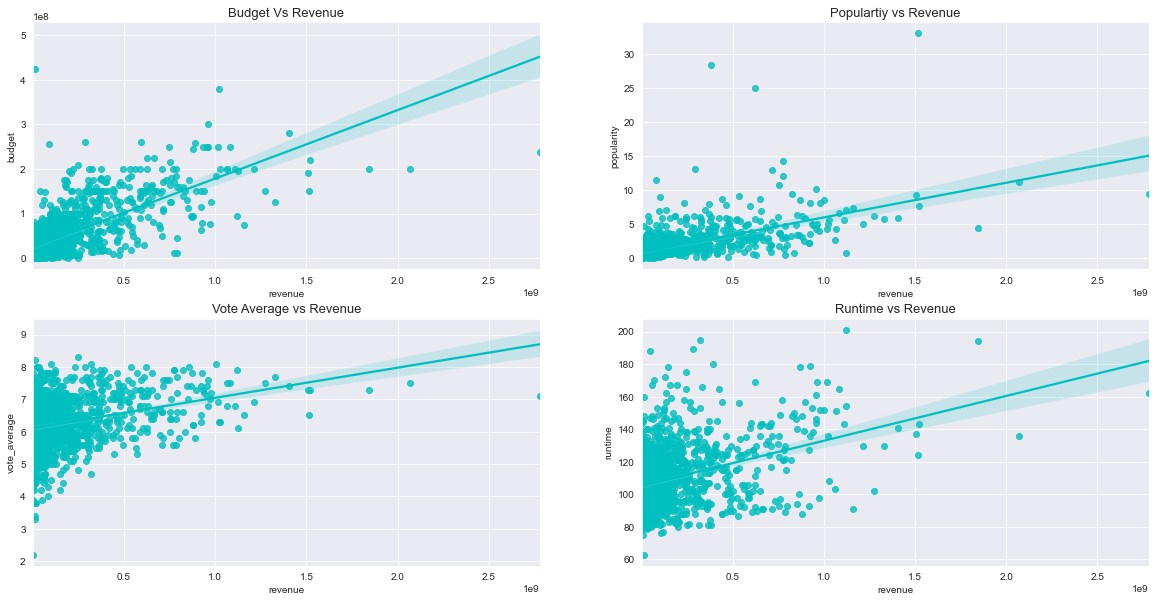

In [32]:
#Creating an x_axis and y_axis variables to add into function

x_axis = revenue['revenue']
y_axis = {'column_1':'budget', 'title_1':'Budget Vs Revenue', 
           'column_2':'popularity', 'title_2':'Populartiy vs Revenue', 
           'column_3':'vote_average', 'title_3':'Vote Average vs Revenue', 
           'column_4':'runtime', 'title_4':'Runtime vs Revenue'}

sub_plots(x_axis, y_axis);

In [33]:
#What's the mean vote_average?
vote_avg_mean = round(revenue.vote_average.mean(), 2)
print('Average vote average is:', vote_avg_mean)

Average vote average is: 6.28


In [34]:
#What's the average movie runtime
movie_avg_runtime = round(revenue.runtime.mean(), 2)
print('The runtime average for a movie is: {} minutes'.format(movie_avg_runtime))

The runtime average for a movie is: 110.27 minutes


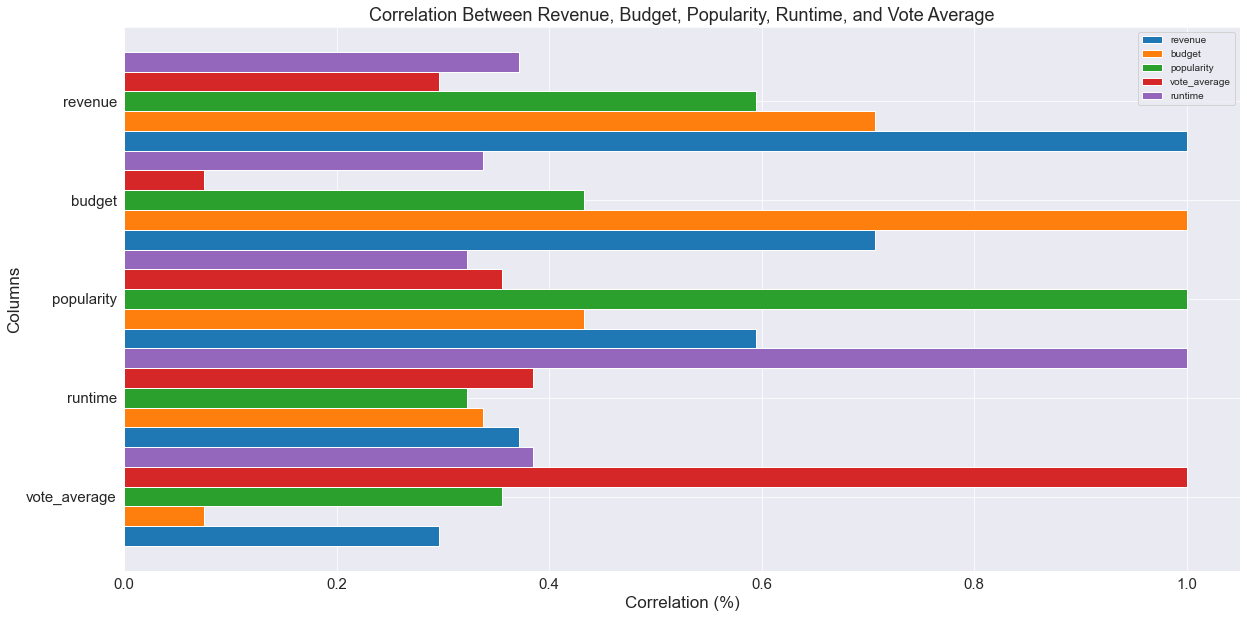

In [35]:
#Plotting correlation between the columns in the dataset
revenue.corr().sort_values('revenue').plot(kind='barh', figsize=(20, 10), fontsize=15, width=1);
plt.xlabel('Correlation (%)', fontsize=17)
plt.ylabel('Columns', fontsize=17)
plt.title('Correlation Between Revenue, Budget, Popularity, Runtime, and Vote Average', fontsize=18)
plt.legend();

In [36]:
revenue.corr()

,revenue,budget,popularity,vote_average,runtime
revenue,1.000000,0.706888,0.594755,0.296501,0.371226
budget,0.706888,1.000000,0.432791,0.075168,0.337373
popularity,0.594755,0.432791,1.000000,0.355904,0.322390
vote_average,0.296501,0.075168,0.355904,1.000000,0.385210
runtime,0.371226,0.337373,0.322390,0.385210,1.000000


In [37]:
#Calculating percentage of movies above and below average budget to check correlation between budget and revenue
avg_budget = df.budget.mean()
a = df[df['budget'] >= avg_budget]['original_title']
b = df[df['budget'] < avg_budget]['original_title']
c = a.count()/(a.count()+b.count())
d = b.count()/(a.count()+b.count())
print('Movies above average budget represents {}% of the dataset, and movies below average budget represents {}%.'.format((c*100).round(2), (d*100).round(2)))

Movies above average budget represents 34.11% of the dataset, and movies below average budget represents 65.89%.


#### Plot 1: Budget vs Revenue
> Correlation =  0.70
* There seems to be a good correlation between Budget and Revenue. But as shown above, the majority of movie budgets falls below the average movie budgets in the dataset.

#### Plot 2: Vote Average vs Revenue
> Correlation = 0.29
* Correlation is very low. Vote average doesn't seem to be a big related factor in revenue.

#### Plot 3: Runtime vs Revenue
> Correlation = 0.37
* Correlation is low. Runtime doesn't seem to be a big related factor in revenue.

#### Plot 4: Popularity vs Revenue
> Correlation = 0.59
* There could be correlation between popularity and revenue. We may say that revenue could be high if popularity is high.

<a id='Q4'></a>
### Research Question 4  (Which years have the most movies released?)

How many movies were produced in 2015

In [38]:
movies_2015 = df[df['release_year'] == 2015]
movies_2015 = movies_2015.release_year.count()
print('Number of movies produced in 2015 are:', movies_2015)

Number of movies produced in 2015 are: 93


Now lets see which years has the most movies release, and which year has the highest movies released

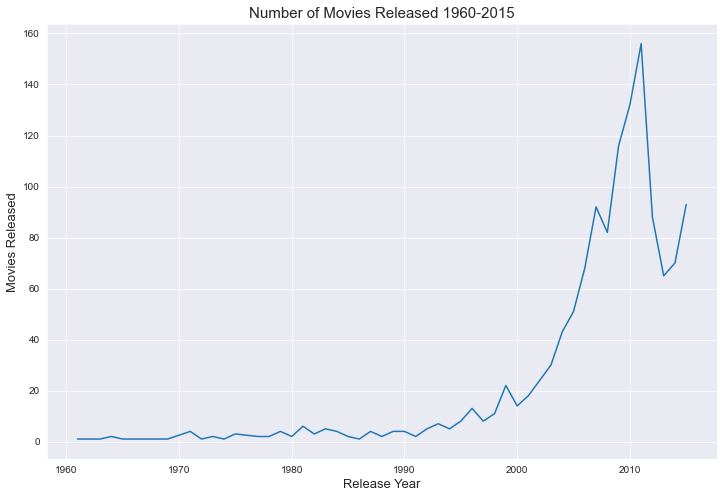

In [39]:
#Grouping by year and counting by number of movies in each year
#Source: https://stackoverflow.com/questions/12608788/changing-the-tick-frequency-on-x-or-y-axis-in-matplotlib
df.groupby('release_year').count()['original_title'].plot(xticks= np.arange(1960, 2016, 10), figsize=(12, 8));
plt.xlabel('Release Year', fontsize=13)
plt.ylabel('Movies Released', fontsize=13)
plt.title('Number of Movies Released 1960-2015', fontsize=15);

Which year has the most movies released?

In [40]:
#Check which year has the highest movies released in cleaned dataset
x = df.groupby('release_year').count()['original_title'].idxmax()
print(x)

2011


In [41]:
#Calculating number of movies produced in 2011
y = df[df['release_year'] == 2011].count()['original_title']
print('Year that has the most released movies is', x, 'with ', y, 'movies released.')

Year that has the most released movies is 2011 with  156 movies released.


Now lets find out who are the top 5 production companies in this dataset

<a id='Q5'></a>
### Research Question 5  (Who are the top 5 production companies with most movies produced?)

In [42]:
#Fecthing production companies stacked data that we've created before
pc_df = df['production_companies'].str.split('|', expand=True)
pc_df.head(3)

,0,1,2,3,4
id,,,,,
135397,Universal Studios,Amblin Entertainment,Legendary Pictures,Fuji Television Network,Dentsu
76341,Village Roadshow Pictures,Kennedy Miller Productions,None,None,None
262500,Summit Entertainment,Mandeville Films,Red Wagon Entertainment,NeoReel,None


In [43]:
#Stacking values together into one column
pc_df = pc_df.stack()
pc_df = pd.DataFrame(pc_df)
pc_df.head(3)

0
id                            
135397 0     Universal Studios
       1  Amblin Entertainment
       2    Legendary Pictures

In [44]:
pc_df = pc_df.rename(columns={0:'production_companies'})
pc_df.head(3)

production_companies
id                            
135397 0     Universal Studios
       1  Amblin Entertainment
       2    Legendary Pictures

How many movies did Universal Pictures produce in this cleaned dataset?

In [45]:
up_pc = pc_df[pc_df['production_companies'] == 'Universal Pictures'].value_counts()[0]
print('Universal Pictures has {} movies produced'.format(up_pc));

Universal Pictures has 120 movies produced


Now let's check the top 5 production companies and lets find out if Universal Pictures is one of them

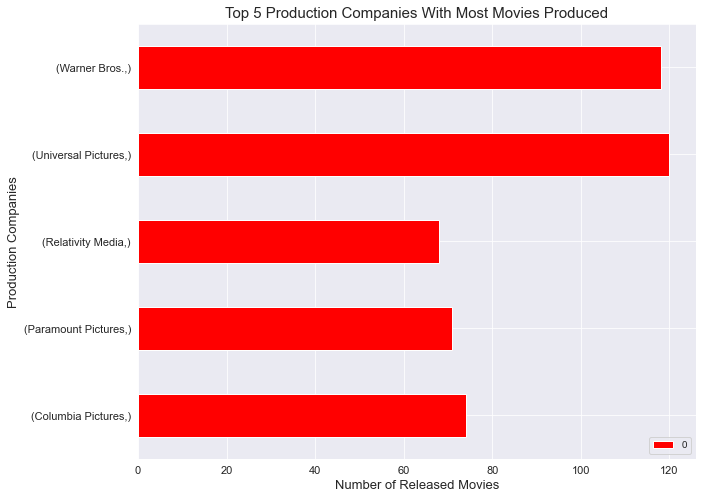

In [55]:
#Calling in plot function and defining variables to use
pd_df_top_5 = pc_df.value_counts()[:5]
x_label = 'Number of Released Movies'
y_label = 'Production Companies'
title = 'Top 5 Production Companies With Most Movies Produced'
column = "production_companies"

plot(pd_df_top_5, column, x_label, y_label, title);

In [47]:
#Prining the name of the production comany with most movies produced
pc_top = pc_df.production_companies.value_counts().idxmax()
print('Production company with most movies produced is {} with {} movies produced'.format(pc_top, up_pc))

Production company with most movies produced is Universal Pictures with 120 movies produced


<a id='conclusions'></a>
## Conclusions
> - Action is the most popular genre over the years
> - Drama is the most produced Genre
> - There's good correlation between Budget, Populartiy, and Revenue
> - 2011 is the year with most movies released
> - Top 5 movies production companies with movies released are (Universal Pictures, Warner Bros.Columbia Pictures, Paramount Pictures, and Relativity Media)

<a id='limitations'></a>
## Limitations
>The genres, cast, production_companies, director, and keywords columns included multiple values in same row separated by pipeline '|'. We've seperated needed columns to be worked on in this analysis such as genres and production_companies. 

> The results in this dataset isn't conclusive, and may vary due to dropping Zero values from multiple cloumns compared to if we would've kept them. But we may say that populartiy and budget do seem to have a good correlation between a movie's revenue. And if the movies budget and popularity is high, it could return high revenue.